**Synchronous Label Propagation**

Cauã Raphaelli

# Importando bibliotecas e arquivos necessários

In [17]:
# importando as libs necessárias

import pandas as pd
import networkx as nx
import numpy as np

In [18]:
# importa os grafos

power = nx.read_gml("power.gml", label=None)
dolphins = nx.read_gml("dolphins.gml")

# Elaborando funções secundárias

In [19]:
# função encontra quais são os rótulos (labels) mais frequentes de cada nó. o dicionario serve pra armazenar o nó e a label respectiva

def mais_frequente(dicio_rotulos_vizinhos):

    df = pd.DataFrame.from_dict(data=dicio_rotulos_vizinhos, orient='index').value_counts().rename_axis('labels').reset_index(name='counts') # cria um dataframe com os rótulos e quantas vezes eles apareceram
    count = max(list(df['counts'])) # faz uma contagem de aparições, e indicando o maior (max)
    labels_mais_freq = df[df['counts'] == count].labels.tolist() # cria uma lista de rótulos mais frequentes

    return labels_mais_freq

In [20]:
# função que printa qual a label mais frequente do grafo nessa época e também plota o gráfico

def plot_grafo(graph):

    print('Label(s) mais frequente(s): ', mais_frequente(nx.get_node_attributes(graph, 'Label'))) # indica o rótulo mais frequente
    nx.draw_networkx(graph, width=0.2, labels=nx.get_node_attributes(graph, "Label"), pos=nx.spring_layout(graph)) # plota o grafo

In [21]:
# função que realiza a propagação dos rótulos que foram elencados como mais frequentes, entre os seus vizinhos

def propagaLabels(graph):
    labels_atualizados = {} # esse dicionario armazena os novos rótulos
    for node in nx.nodes(graph): # faz a iteração pelos nodes
        principais = mais_frequente(nx.get_node_attributes(nx.subgraph(graph, nx.neighbors(graph, node)), "Label")) # acha qual é o rótulo mais frequente daquele nó
        if len(principais) > 1: # condicional para o caso de não ter um rótulo mais frequente, ele vai escolher um aleatório para desempatar
            labels_atualizados[node] = np.random.choice(principais, 1)[0] # atribui o rótulo escolhido aleatoriamente
        else:
            labels_atualizados[node] = principais[0] # insere no dicionário o novo rótulo
    # muda o label
    nx.set_node_attributes(graph, nx.get_node_attributes(graph, 'rotulo_novo'), 'Label')
    # muda o rotulo_novo
    nx.set_node_attributes(graph, labels_atualizados, 'rotulo_novo')

In [22]:
def qtd_grupos(graph):
    labels_set = set(nx.get_node_attributes(graph, 'Label').values())
    return len(labels_set)

# Implementando o algoritmo - função principal e critérios de parada

In [23]:
# função principal que executa a SLP (Synchronous Label Propagation)

def SLP(graph, haltFlag):

    for node in nx.nodes(graph):
        nx.set_node_attributes(graph, {node: {"Label": node, 'rotulo_novo': node}}) # atributos iniciais

    if haltFlag == "grupos":
        grupos = qtd_grupos(graph) # define o criterio de parada "haltFlag" de numero grupos, cada rótulo é um grupo
        while grupos > 3:
            propagaLabels(graph) # enquanto tiver mais que x grupos, ele vai chamar a função de propagar as labels
            grupos = qtd_grupos(graph) # atualiza o num de grupos
    elif haltFlag == "numIteracoes":
            inst = 0
            while inst < 50: # Criterio de parada "haltFlag" de numero de iterações, definindo um numero maximo delas
                inst += 1
                propagaLabels(graph) # enquanto tiver menos que x iterações, chama a função de propagar labels

    plot_grafo(graph) # plota o grafo final usando a função de plotar definida anteriormente

# Execução final

Label(s) mais frequente(s):  ['Grin']


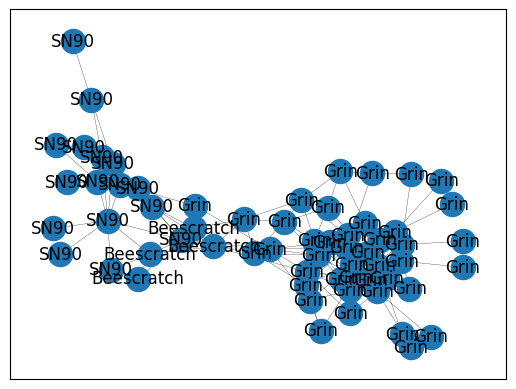

In [24]:
SLP(dolphins, "grupos") # executa com o grafo dolphins, usando o criterio que melhor funcionou para ela, que é o de parada de grupos
# SLP(power, "numIteracoes") # executa com o grafo powergrid, por ser um grafo bem pesado, o criterio ideal foi o de numero de iteracoes maximas, ainda assim demorando bastante